<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S7_intro_ML/S07_In_After_Class_Demo_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7: Introduction to ML - Classification

## Demo: Classification on Customer Churn Dataset - full-scale with tree exploration and visualization

Classification using customer service churn dataset (https://www.kaggle.com/blastchar/telco-customer-churn).

This notebook is used to demonstrate the pipeline runs on the full dataset. You can review this once you are familiar with the main pipeline and building blocks of the predictive task. For the detailed description of each step, please refer to the other simple notebook example of Telco.

In [8]:
!pip install -q dtreeviz
from dtreeviz.trees import *

     |████████████████████████████████| 51kB 2.6MB/s 


In [2]:
import sklearn
from sklearn import *

## **Blocks 1 and 2**: data input and feature preparation

In [3]:
import pandas as pd
# Load transformed dataset
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S7_intro_ML/data/Telco-Customer-Churn_dummies.csv'
customer_data = pd.read_csv(url)

#take only column 2 until the column prior to the predicted value (the last column is the label y)
selected_features = customer_data.columns[1:-1].values 

print(selected_features)
X = customer_data[selected_features].values
y = customer_data['Churn_Yes'].values
customer_data.head(5)

['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No' 'OnlineSecurity_Yes'
 'OnlineBackup_Yes' 'DeviceProtection_Yes' 'TechSupport_Yes'
 'StreamingTV_Yes' 'StreamingMovies_Yes' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [78]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

print("N. Training:", len(y_train), ", N. Testing:", len(y_test))

N. Training: 5274 , N. Testing: 1758


## **Blocks 3 and 4**: Model and validation

### Model 1: Logistic regression 

In addition to precision and recall, we can also measure the aggregate measure of both which is called F-Score (see [link](https://en.wikipedia.org/wiki/F-score)). The F-1 Score is a harmonic mean of both measures where `F-Score = 1.0`  indicates the perfect precision and recall whereas the lowest value is `F-Score = 0` which occurs when either precision or recall equals zero. F-Score score can be calculated as follows:

$F_1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2\frac{Precision \times Recall}{Precision + Recall}$

We can use sklearn function `.f1_score(y_true, y_predict)` to calculate it (see [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html))

In [59]:
# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

# Predict the values y from the trained model on the test set
y_predict = logreg.predict(X_test)
print("Logistic Regression: Precision: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Logistic Regression: Recall: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))
print("Logistic Regression: F1-Score: {:.3f}".format(sklearn.metrics.f1_score(y_test, y_predict)))

# We can also print out a confusion matrix
print("Display confusion matrix")
print(sklearn.metrics.confusion_matrix(y_test, y_predict))

Logistic Regression: Training accuracy: 0.804
Logistic Regression: Testing accuracy: 0.803
Logistic Regression: Precision: 0.643
Logistic Regression: Recall: 0.508
Logistic Regression: F1-Score: 0.568
Display confusion matrix
[[1185  126]
 [ 220  227]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model 2: Decision tree

Here we try the decision tree with different `max_depth` to evaluate the results.

In [61]:
# Run decision tree

tree_results = pd.DataFrame(columns = ['Depth','Train-Accuracy','Test-Accuracy','Precision','Recall', 'F-Score'])
best_depth = 1

for depth in range(2,8):
  tree = sklearn.tree.DecisionTreeClassifier(max_depth = depth, random_state=0).fit(X_train, y_train)
  y_predict = tree.predict(X_test)

  # compute each measure and add to the new row in DataFrame
  train_acc = tree.score(X_train, y_train) # accuracy on the training set
  test_acc = tree.score(X_test, y_test)  # accuracy on the test set
  test_precision = sklearn.metrics.precision_score(y_test, y_predict) # precision on the test set
  test_recall = sklearn.metrics.recall_score(y_test, y_predict) # recall on the test set
  f_score = 2*test_precision*test_recall/(test_precision+test_recall) # f-score on the test set (manual calculation)

  # add the results (list) to the last row in the DataFrame
  tree_results.loc[len(tree_results)] = [depth,train_acc,test_acc,test_precision,test_recall,f_score]

  # we keep track of the best depth
  if f_score >= max(tree_results['F-Score']):
    best_depth = depth

print("Best depth = ", best_depth)
tree_results

Best depth =  5


,Depth,Train-Accuracy,Test-Accuracy,Precision,Recall,F-Score
0,2.0,0.788775,0.794653,0.664122,0.389262,0.490832
1,3.0,0.788775,0.794653,0.664122,0.389262,0.490832
2,4.0,0.789723,0.794653,0.613158,0.521253,0.563482
3,5.0,0.805271,0.798066,0.621053,0.527964,0.570738
4,6.0,0.811528,0.793515,0.632075,0.449664,0.525490
5,7.0,0.828024,0.787827,0.619355,0.429530,0.507266


We can also plot the feature importance to explore the insights of the best tree (based on F-score).

,Importance
Partner_Yes,0.001796
OnlineBackup_Yes,0.004629
SeniorCitizen,0.006383
TechSupport_Yes,0.007483
Contract_One year,0.008653
PhoneService_Yes,0.008820
MultipleLines_Yes,0.012285
MonthlyCharges,0.017019
InternetService_No,0.025387
Contract_Two year,0.026369


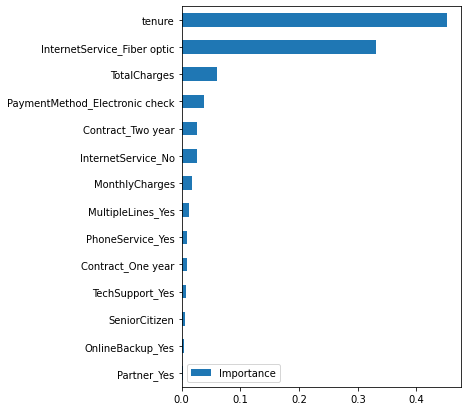

In [68]:
# retrain the model using the best depth
tree = sklearn.tree.DecisionTreeClassifier(max_depth = best_depth, random_state=0).fit(X_train, y_train)

# obtain feature importance scores and save in dataframe
feature_df = pd.DataFrame(index = selected_features)
feature_df['Importance'] = tree.feature_importances_
feature_df =feature_df[feature_df['Importance'] > 0].sort_values('Importance')
display(feature_df)

feature_df.plot(kind='barh', figsize = (5,7))

### Tree exploration and visualization

In the lecture, we plot the tree in `sklearn` using the function [link text] (https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). However, we might consider using a better visualization from `dtreeviz` package [link1](https://github.com/parrt/dtreeviz), [link2](https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/examples.ipynb) and [link3](https://explained.ai/decision-tree-viz/) to visualize the tree. This package can be slow to run in particular with a large dataset and deep tree so you should limit the tree size when using it.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


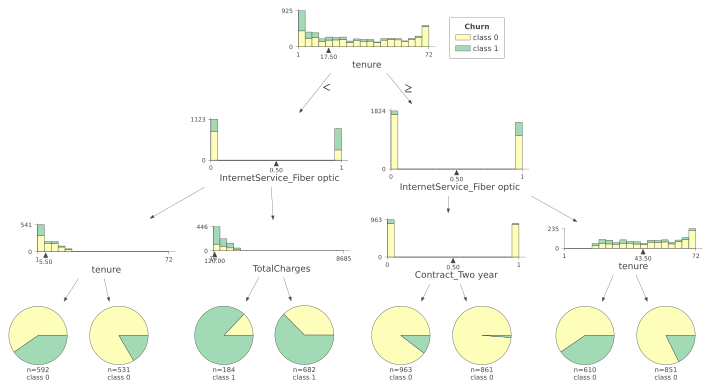

In [77]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth = 3, random_state=0).fit(X_train, y_train)
viz = dtreeviz(tree, X_train, y_train, target_name="Churn", feature_names=selected_features)
viz

You can also save the tree visualization by calling the function.

In [70]:
viz.save('tree.svg')

For Colab, we also need to download it again.

In [71]:
from google.colab import files
files.download('tree.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Another use of this library is to display a specific path of the prediction for a single data point. Here we display the path and also change the orientation of the plot to left-right.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


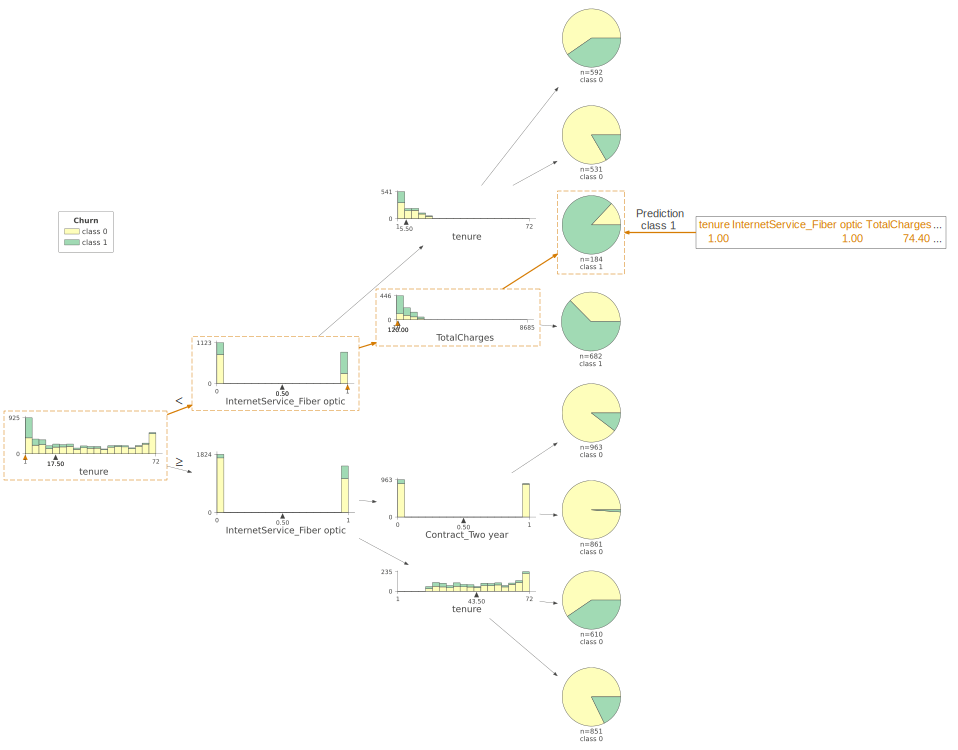

In [72]:
vizpath = dtreeviz(tree, X_train, y_train, target_name="Churn", feature_names=selected_features, orientation ='LR', X = X_test[4])
vizpath

Alternatively, you can also show a single path (rather than the entire tree).

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


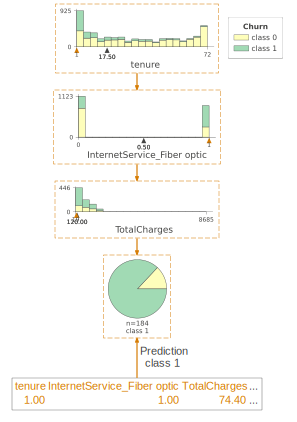

In [73]:
vizpath = dtreeviz(tree, X_train, y_train, target_name="Churn", feature_names=selected_features, show_just_path=True, X = X_test[4])
vizpath